# historical_person, teqniquie,collection, material.csv

In [1]:
import pandas as pd
from pathlib import Path

from geopy.geocoders import Nominatim
import numpy as np
from tqdm import tqdm_notebook as tqdm
from ptitprince import RainCloud
import matplotlib.pyplot as plt


In [2]:
DATA_DIR = Path("/home/knikaido/work/atma10/data/")

In [3]:
train = pd.read_csv(DATA_DIR / 'train.csv')
train['log_likes'] = np.log10(train['likes'] + 1)

In [4]:
object_historical_person = pd.read_csv(DATA_DIR / 'historical_person.csv')
object_historical_person

,object_id,name
0,00133be3ff222c9b74b0,Staten-Generaal
1,00133be3ff222c9b74b0,"Álvarez de Toledo, Fernando (3e hertog van Alva)"
2,0026e030a0209b834b3e,Raad van Beroerten
3,0026e030a0209b834b3e,"Álvarez de Toledo, Fernando (3e hertog van Alva)"
4,00440ec5a4783b4b6bdb,Dolle Mina
...,...,...
6740,fff08e76cbb969eaddc7,Leopold I (keizer van Duitsland)
6741,fff08e76cbb969eaddc7,Jacobus II (koning van Engeland en Schotland)
6742,fff08e76cbb969eaddc7,Karel II (koning van Spanje)
6743,fff08e76cbb969eaddc7,"Stuart, Jacobus Frans Eduard (prins van Wales)"


In [5]:
object_historical_person['name'].value_counts()

Willem III (prins van Oranje en koning van Engeland, Schotland en Ierland)    193
Lodewijk XIV (koning van Frankrijk)                                           134
Verenigde Oostindische Compagnie                                              134
Willem I (prins van Oranje)                                                    95
Wilhelm II (keizer van Duitsland)                                              84
                                                                             ... 
Sparre, Karel Willem baron van                                                  1
Rijsdijk Takens, Jacobus                                                        1
Georg (koning van Saksen)                                                       1
Blanken Jansz., Jan                                                             1
Tollens, Louis Jacobus Anthonie                                                 1
Name: name, Length: 2562, dtype: int64

In [6]:
vc = object_historical_person['name'].value_counts()

# 出現回数30以上に絞る
use_names = vc[vc > 30].index

# isin で 30 回以上でてくるようなレコードに絞り込んでから corsstab を行なう
idx = object_historical_person['name'].isin(use_names)
_use_df = object_historical_person[idx].reset_index(drop=True)
df_person = pd.crosstab(_use_df['object_id'], _use_df['name'])
df_person

name,"Djatiroto, Suikeronderneming",Frederik Hendrik (prins van Oranje),Handels Vereeniging Amsterdam,Jacobus II (koning van Engeland en Schotland),Lodewijk XIV (koning van Frankrijk),"Maria II Stuart (koningin van Engeland, Schotland en Ierland)",Maurits (prins van Oranje),"Musschenbroek, Sam van","Oldenbarnevelt, Johan van","Titzenthaler, Eckart",...,Wehrmacht,Wilhelm II (keizer van Duitsland),Wilhelmina (koningin der Nederlanden),Willem I (prins van Oranje),Willem III (koning der Nederlanden),"Willem III (prins van Oranje en koning van Engeland, Schotland en Ierland)","Wirix, F.J.","Witt, Cornelis de","Witt, Johan de","Álvarez de Toledo, Fernando (3e hertog van Alva)"
object_id,,,,,,,,,,,,,,,,,,,,,
00133be3ff222c9b74b0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0026e030a0209b834b3e,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
009d44bd779a8722b00c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
00cd543929cbd97be573,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00d601332278b5dad17e,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff4e08fb9e8887bbe1a3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ff657e8134633815bf1d,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
ff7b9c0a4a4cbaa7f7db,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_person.columns

Index(['Djatiroto, Suikeronderneming', 'Frederik Hendrik (prins van Oranje)',
       'Handels Vereeniging Amsterdam',
       'Jacobus II (koning van Engeland en Schotland)',
       'Lodewijk XIV (koning van Frankrijk)',
       'Maria II Stuart (koningin van Engeland, Schotland en Ierland)',
       'Maurits (prins van Oranje)', 'Musschenbroek, Sam van',
       'Oldenbarnevelt, Johan van', 'Titzenthaler, Eckart',
       'Titzenthaler, Marba', 'Tjomal Suikerfabriek',
       'Verenigde Oostindische Compagnie', 'Wehrmacht',
       'Wilhelm II (keizer van Duitsland)',
       'Wilhelmina (koningin der Nederlanden)', 'Willem I (prins van Oranje)',
       'Willem III (koning der Nederlanden)',
       'Willem III (prins van Oranje en koning van Engeland, Schotland en Ierland)',
       'Wirix, F.J.', 'Witt, Cornelis de', 'Witt, Johan de',
       'Álvarez de Toledo, Fernando (3e hertog van Alva)'],
      dtype='object', name='name')

In [47]:
cols = []
for i in range(len(list(df_person.columns))):
    cols.append('person_' + str(i))
df_person.columns = cols
df_person = df_person.add_prefix('OH_')
df_person.reset_index(inplace=True)
df_person

,object_id,OH_person_0,OH_person_1,OH_person_2,OH_person_3,OH_person_4,OH_person_5,OH_person_6,OH_person_7,OH_person_8,...,OH_person_13,OH_person_14,OH_person_15,OH_person_16,OH_person_17,OH_person_18,OH_person_19,OH_person_20,OH_person_21,OH_person_22
0,00133be3ff222c9b74b0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0026e030a0209b834b3e,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,009d44bd779a8722b00c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,00cd543929cbd97be573,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,00d601332278b5dad17e,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,ff4e08fb9e8887bbe1a3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1261,ff657e8134633815bf1d,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1262,ff7b9c0a4a4cbaa7f7db,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1263,ffbe15cc751929195346,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df_person.to_csv(DATA_DIR / 'person_one_hot.csv', index=False)

In [23]:
df_person = pd.merge(df_person, train, on='object_id', how='left')
df_person

,object_id,"Djatiroto, Suikeronderneming",Frederik Hendrik (prins van Oranje),Handels Vereeniging Amsterdam,Jacobus II (koning van Engeland en Schotland),Lodewijk XIV (koning van Frankrijk),"Maria II Stuart (koningin van Engeland, Schotland en Ierland)",Maurits (prins van Oranje),"Musschenbroek, Sam van","Oldenbarnevelt, Johan van",...,acquisition_method,acquisition_date,acquisition_credit_line,dating_presenting_date,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes,log_likes
0,00133be3ff222c9b74b0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0026e030a0209b834b3e,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,009d44bd779a8722b00c,0,0,0,0,0,0,0,0,0,...,purchase,1904-01-25T00:00:00,NaN,1672,1672.0,17.0,1672.0,1672.0,8.0,0.954243
3,00cd543929cbd97be573,0,0,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00d601332278b5dad17e,0,0,0,0,0,0,0,1,0,...,loan,1972-10-18T00:00:00,On loan from a private collector,1890 - 1910,1890.0,19.0,1890.0,1910.0,5.0,0.778151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,ff4e08fb9e8887bbe1a3,0,1,0,0,0,0,0,0,0,...,purchase,1881-01-01T00:00:00,NaN,1647,1647.0,17.0,1647.0,1647.0,7.0,0.903090
1261,ff657e8134633815bf1d,0,0,0,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1262,ff7b9c0a4a4cbaa7f7db,0,0,0,0,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1263,ffbe15cc751929195346,0,0,0,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


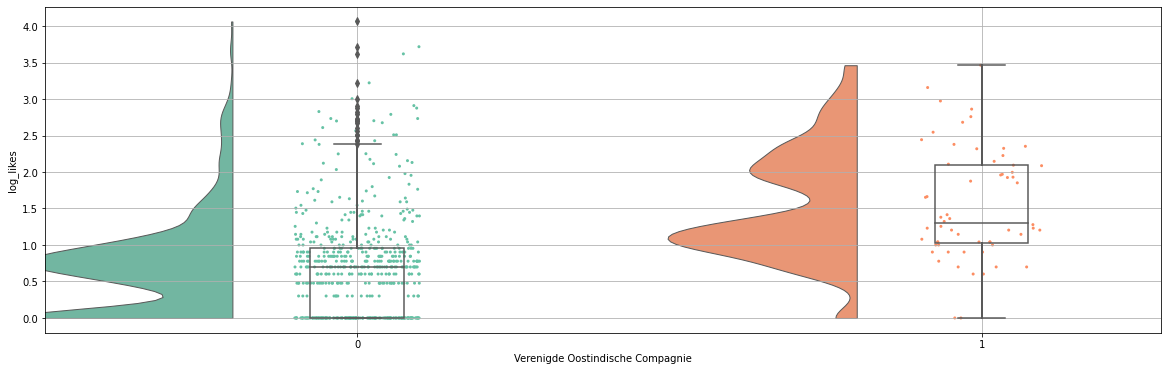

In [27]:
fig, ax = plt.subplots(figsize=(20, 6))
RainCloud(data=df_person, y='log_likes', x='Verenigde Oostindische Compagnie', ax=ax)
ax.grid()

In [4]:
# data load
object_collection = pd.read_csv(DATA_DIR / 'object_collection.csv')
object_collection

,object_id,name
0,001020bd00b149970f78,paintings
1,0011d6be41612ec9eae3,paintings
2,00133be3ff222c9b74b0,prints
3,00181d86ff1a7b95864e,paintings
4,001c52ae28ec106d9cd5,paintings
...,...,...
14205,ffe7e1649e805918e42c,prints
14206,ffee34705ea44e1a0f79,prints
14207,ffefbe1faf771aa4f790,prints
14208,fff08e76cbb969eaddc7,prints


In [54]:
production_onehot_collection= pd.get_dummies(object_collection['name'])
production_onehot_collection = production_onehot_collection.add_prefix('OH_coll_')
production_onehot_collection['object_id'] = object_collection['object_id']
production_onehot_collection

,OH_coll_Navy Model Room,OH_coll_dollhouse,OH_coll_drawings,OH_coll_glass,OH_coll_jewellery,OH_coll_lace,OH_coll_musical instruments,OH_coll_paintings,OH_coll_paper,OH_coll_prints,object_id
0,0,0,0,0,0,0,0,1,0,0,001020bd00b149970f78
1,0,0,0,0,0,0,0,1,0,0,0011d6be41612ec9eae3
2,0,0,0,0,0,0,0,0,0,1,00133be3ff222c9b74b0
3,0,0,0,0,0,0,0,1,0,0,00181d86ff1a7b95864e
4,0,0,0,0,0,0,0,1,0,0,001c52ae28ec106d9cd5
...,...,...,...,...,...,...,...,...,...,...,...
14205,0,0,0,0,0,0,0,0,0,1,ffe7e1649e805918e42c
14206,0,0,0,0,0,0,0,0,0,1,ffee34705ea44e1a0f79
14207,0,0,0,0,0,0,0,0,0,1,ffefbe1faf771aa4f790
14208,0,0,0,0,0,0,0,0,0,1,fff08e76cbb969eaddc7


In [55]:
production_onehot_collection = production_onehot_collection.groupby('object_id').apply(lambda x: x.sum()).drop('object_id',axis=1).reset_index()
production_onehot_collection

,object_id,OH_coll_Navy Model Room,OH_coll_dollhouse,OH_coll_drawings,OH_coll_glass,OH_coll_jewellery,OH_coll_lace,OH_coll_musical instruments,OH_coll_paintings,OH_coll_paper,OH_coll_prints
0,001020bd00b149970f78,0,0,0,0,0,0,0,1,0,0
1,0011d6be41612ec9eae3,0,0,0,0,0,0,0,1,0,0
2,00133be3ff222c9b74b0,0,0,0,0,0,0,0,0,0,1
3,00181d86ff1a7b95864e,0,0,0,0,0,0,0,1,0,0
4,001c52ae28ec106d9cd5,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
14155,ffe7e1649e805918e42c,0,0,0,0,0,0,0,0,0,1
14156,ffee34705ea44e1a0f79,0,0,0,0,0,0,0,0,0,1
14157,ffefbe1faf771aa4f790,0,0,0,0,0,0,0,0,0,1
14158,fff08e76cbb969eaddc7,0,0,0,0,0,0,0,0,0,1


In [58]:
df_person = pd.merge(production_onehot_collection, train, on='object_id', how='left')
df_person

,object_id,OH_coll_Navy Model Room,OH_coll_dollhouse,OH_coll_drawings,OH_coll_glass,OH_coll_jewellery,OH_coll_lace,OH_coll_musical instruments,OH_coll_paintings,OH_coll_paper,...,acquisition_method,acquisition_date,acquisition_credit_line,dating_presenting_date,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes,log_likes
0,001020bd00b149970f78,0,0,0,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0011d6be41612ec9eae3,0,0,0,0,0,0,0,1,0,...,purchase,1808-01-01T00:00:00,NaN,1660 - 1685,1660.0,17.0,1660.0,1685.0,48.0,1.690196
2,00133be3ff222c9b74b0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00181d86ff1a7b95864e,0,0,0,0,0,0,0,1,0,...,bequest,1881-01-01T00:00:00,"J. Hilman Bequest, Amsterdam",c. 1850 - c. 1879,1850.0,19.0,1850.0,1879.0,100.0,2.004321
4,001c52ae28ec106d9cd5,0,0,0,0,0,0,0,1,0,...,unknown,1971-01-01T00:00:00,NaN,1825 - 1874,1825.0,19.0,1825.0,1874.0,7.0,0.903090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14155,ffe7e1649e805918e42c,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14156,ffee34705ea44e1a0f79,0,0,0,0,0,0,0,0,0,...,purchase,1881-01-01T00:00:00,NaN,1701 - 1714,1701.0,18.0,1701.0,1714.0,0.0,0.000000
14157,ffefbe1faf771aa4f790,0,0,0,0,0,0,0,0,0,...,transfer,1887-01-01T00:00:00,NaN,1778,1778.0,18.0,1778.0,1778.0,0.0,0.000000
14158,fff08e76cbb969eaddc7,0,0,0,0,0,0,0,0,0,...,purchase,1881-01-01T00:00:00,NaN,1689 - 1690,1689.0,17.0,1689.0,1690.0,14.0,1.176091


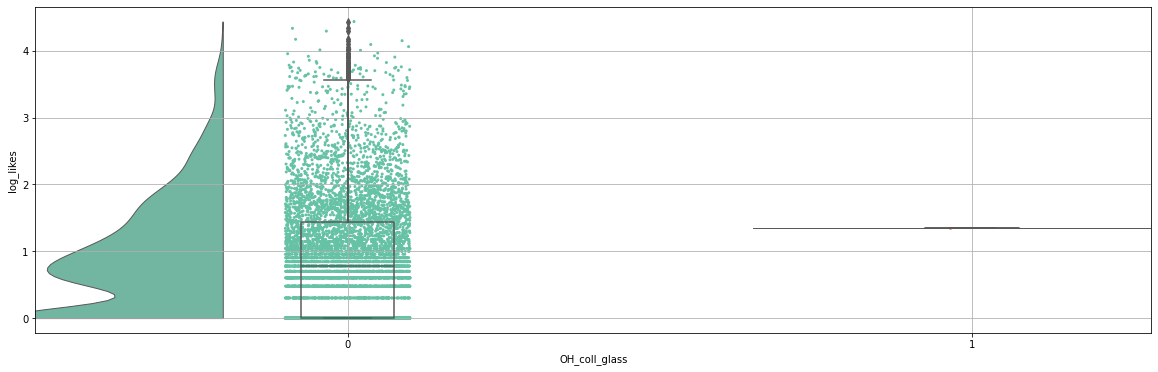

In [59]:
fig, ax = plt.subplots(figsize=(20, 6))
RainCloud(data=df_person, y='log_likes', x='OH_coll_glass', ax=ax)
ax.grid()

In [6]:
production_onehot_collection.to_csv(DATA_DIR / 'collection_one_hot.csv', index=False)

In [5]:
# data load
technique = pd.read_csv(DATA_DIR / 'technique.csv')
technique

,object_id,name
0,000405d9a5e3f49fc49d,albumen print
1,0012765f7a97ccc3e9e9,salted paper print
2,0012765f7a97ccc3e9e9,albumen print
3,00133be3ff222c9b74b0,etching
4,0017be8caa87206532cb,albumen print
...,...,...
20476,fff4bbb55fd7702d294e,albumen print
20477,fffbe07b997bec00e203,albumen print
20478,fffd1675758205748d7f,albumen print
20479,fffd43b134ba7197d890,albumen print


In [8]:
production_onehot_technique= pd.get_dummies(technique['name'])
production_onehot_technique = production_onehot_technique.add_prefix('OH_tech_')
production_onehot_technique['object_id'] = technique['object_id']
production_onehot_technique

,OH_tech_Valenciennes lace,OH_tech_albumen print,OH_tech_ambrotype,OH_tech_brush,OH_tech_carbon print,OH_tech_collotype,OH_tech_colour woodcut,OH_tech_counterproof,OH_tech_cutting,OH_tech_cyanotype,...,OH_tech_pen,OH_tech_perforating,OH_tech_photolithography,OH_tech_printed matter,OH_tech_printing,OH_tech_salted paper print,OH_tech_slide,OH_tech_steel engraving,OH_tech_writing (processes),object_id
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,000405d9a5e3f49fc49d
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0012765f7a97ccc3e9e9
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0012765f7a97ccc3e9e9
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,00133be3ff222c9b74b0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0017be8caa87206532cb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20476,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,fff4bbb55fd7702d294e
20477,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,fffbe07b997bec00e203
20478,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,fffd1675758205748d7f
20479,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,fffd43b134ba7197d890


In [9]:
production_onehot_technique = production_onehot_technique.groupby('object_id').apply(lambda x: x.sum()).drop('object_id',axis=1).reset_index()
production_onehot_technique

,object_id,OH_tech_Valenciennes lace,OH_tech_albumen print,OH_tech_ambrotype,OH_tech_brush,OH_tech_carbon print,OH_tech_collotype,OH_tech_colour woodcut,OH_tech_counterproof,OH_tech_cutting,...,OH_tech_painting,OH_tech_pen,OH_tech_perforating,OH_tech_photolithography,OH_tech_printed matter,OH_tech_printing,OH_tech_salted paper print,OH_tech_slide,OH_tech_steel engraving,OH_tech_writing (processes)
0,000405d9a5e3f49fc49d,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0012765f7a97ccc3e9e9,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,00133be3ff222c9b74b0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0017be8caa87206532cb,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,001f4c71b4d53497b531,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17324,fff4bbb55fd7702d294e,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17325,fffbe07b997bec00e203,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17326,fffd1675758205748d7f,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17327,fffd43b134ba7197d890,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
production_onehot_technique.to_csv(DATA_DIR / 'technique_one_hot.csv', index=False)

In [6]:
material = pd.read_csv(DATA_DIR / 'material.csv')
material

,object_id,name
0,000405d9a5e3f49fc49d,photographic paper
1,000405d9a5e3f49fc49d,cardboard
2,001020bd00b149970f78,oil paint (paint)
3,001020bd00b149970f78,panel
4,0011d6be41612ec9eae3,oil paint (paint)
...,...,...
35389,fffbe07b997bec00e203,photographic paper
35390,fffbe07b997bec00e203,cardboard
35391,fffd43b134ba7197d890,photographic paper
35392,ffff22ea12d7f99cff31,paper


In [12]:
production_onehot_material= pd.get_dummies(material['name'])
production_onehot_material = production_onehot_material.add_prefix('OH_mate_')
production_onehot_material['object_id'] = material['object_id']
production_onehot_material

,OH_mate_China paper,OH_mate_Japanese paper (handmade paper),OH_mate_RC paper,OH_mate_acrylic paint,OH_mate_alloy,OH_mate_amalgam,OH_mate_asbestos,OH_mate_asbestos-cement,OH_mate_ball-point pens,OH_mate_baryta paper,...,OH_mate_tin (metal),OH_mate_tin alloy,OH_mate_tracing paper,OH_mate_transparant paper,OH_mate_velvet (fabric weave),OH_mate_watercolor (paint),OH_mate_wax,OH_mate_wood (plant material),OH_mate_wood board,object_id
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,000405d9a5e3f49fc49d
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,000405d9a5e3f49fc49d
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,001020bd00b149970f78
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,001020bd00b149970f78
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0011d6be41612ec9eae3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,fffbe07b997bec00e203
35390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,fffbe07b997bec00e203
35391,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,fffd43b134ba7197d890
35392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ffff22ea12d7f99cff31


In [13]:
production_onehot_material = production_onehot_material.groupby('object_id').apply(lambda x: x.sum()).drop('object_id',axis=1).reset_index()
production_onehot_material

,object_id,OH_mate_China paper,OH_mate_Japanese paper (handmade paper),OH_mate_RC paper,OH_mate_acrylic paint,OH_mate_alloy,OH_mate_amalgam,OH_mate_asbestos,OH_mate_asbestos-cement,OH_mate_ball-point pens,...,OH_mate_textile materials,OH_mate_tin (metal),OH_mate_tin alloy,OH_mate_tracing paper,OH_mate_transparant paper,OH_mate_velvet (fabric weave),OH_mate_watercolor (paint),OH_mate_wax,OH_mate_wood (plant material),OH_mate_wood board
0,000405d9a5e3f49fc49d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,001020bd00b149970f78,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0011d6be41612ec9eae3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0012765f7a97ccc3e9e9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,00133be3ff222c9b74b0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23581,fff1d87d79953ddab2c6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23582,fff4bbb55fd7702d294e,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23583,fffbe07b997bec00e203,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23584,fffd43b134ba7197d890,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
production_onehot_material.to_csv(DATA_DIR / 'material_one_hot.csv', index=False)

In [8]:
country = pd.read_csv(DATA_DIR / 'production_place_country_raw.csv')
country = country.rename(columns={"country_name":"name"})
country = country.dropna(how='any')
country

,object_id,name
0,0012765f7a97ccc3e9e9,Netherlands
1,00133be3ff222c9b74b0,Netherlands
2,0017be8caa87206532cb,Netherlands
3,001b2b8c9d3aa1534dfe,Suriname
4,001c52ae28ec106d9cd5,Netherlands
...,...,...
16373,fff08e76cbb969eaddc7,Netherlands
16374,fff08e76cbb969eaddc7,Belgium
16375,fffbe07b997bec00e203,United Kingdom
16376,fffd43b134ba7197d890,United Kingdom


In [10]:
country['name'].value_counts()

Netherlands       9128
France            1446
Belgium           1399
Indonesia          986
Italy              862
Germany            776
United Kingdom     491
Denmark            289
Suriname           282
United States      237
Norway             106
Japan               96
Switzerland         59
India               51
Austria             45
Spain               44
China               42
Iran                22
Sri Lanka           11
Russia               2
Canada               1
Poland               1
Greece               1
Name: name, dtype: int64

## word2vec使ってみる

In [69]:
from gensim.models import word2vec, KeyedVectors
import hashlib
from tqdm import tqdm
tqdm.pandas()

In [70]:
mat_col = pd.concat([material, object_collection], axis=0).reset_index(drop=True)
mat_tec = pd.concat([material, technique], axis=0).reset_index(drop=True)
col_tec = pd.concat([object_collection, technique], axis=0).reset_index(drop=True)
col_can = pd.concat([object_collection, country], axis=0).reset_index(drop=True)
mat_can = pd.concat([material, country], axis=0).reset_index(drop=True)
tec_can = pd.concat([technique, country], axis=0).reset_index(drop=True)
mat_col_tec = pd.concat([material, object_collection, technique], axis=0).reset_index(drop=True)
mat_col_can = pd.concat([material, object_collection, country], axis=0).reset_index(drop=True)
mat_tec_can = pd.concat([material, technique, country], axis=0).reset_index(drop=True)
col_tec_can = pd.concat([object_collection, technique, country], axis=0).reset_index(drop=True)
mat_col_tec_can = pd.concat([material, object_collection, technique, country], axis=0).reset_index(drop=True)

In [71]:
# 単語ベクトル表現の次元数
# 元の語彙数をベースに適当に決めました
model_size = {
    "material": 20,
    "technique": 8,
    "collection": 3,
    "country": 3,
    "material_collection": 20,
    "material_technique": 20,
    "collection_technique": 10,
    "collection_country": 5,
    "material_country": 20,
    "technique_country": 10,
    "material_collection_technique": 25,
    "material_collection_country": 22,
    "material_technique_country": 25,
    "collection_technique_country": 10,
    "material_collection_technique_country": 25,
}

n_iter = 100


In [72]:
def hashfxn(x):
    return int(hashlib.md5(str(x).encode()).hexdigest(), 16)

In [74]:
w2v_dfs = []
for df, df_name in zip(
        [
            material, object_collection, technique, country,
            mat_col, mat_tec, col_tec, col_can, mat_can, tec_can,
            mat_col_tec, mat_col_can, mat_tec_can, col_tec_can, mat_col_tec_can
        ], [
            "material", "collection", "technique", "country",
            "material_collection",
            "material_technique",
            "collection_technique",
            "collection_country",
            "material_country",
            "technique_country",
            "material_collection_technique",
            "material_collection_country",
            "material_technique_country",
            "collection_technique_country",
            "material_collection_technique_country"
        ]):
    df_group = df.groupby("object_id")["name"].apply(list).reset_index()
    # Word2Vecの学習
    w2v_model = word2vec.Word2Vec(df_group["name"].values.tolist(),
                                  size=model_size[df_name],
                                  min_count=1,
                                  window=1,
                                  hashfxn=hashfxn,
                                  iter=n_iter)

    # 各文章ごとにそれぞれの単語をベクトル表現に直し、平均をとって文章ベクトルにする
    sentence_vectors = df_group["name"].progress_apply(
        lambda x: np.mean([w2v_model.wv[e] for e in x], axis=0))
    sentence_vectors = np.vstack([x for x in sentence_vectors])
    sentence_vector_df = pd.DataFrame(sentence_vectors,
                                      columns=[f"{df_name}_w2v_{i}"
                                               for i in range(model_size[df_name])])
    sentence_vector_df.index = df_group["object_id"]
    w2v_dfs.append(sentence_vector_df)

100%|██████████| 23972/23972 [00:00<00:00, 58727.89it/s]


In [75]:
len(w2v_dfs)

15

In [76]:
import pickle

In [77]:
with open(DATA_DIR / 'word2vec.pickle', mode='wb') as fp:
    pickle.dump(w2v_dfs, fp)
    

In [29]:
len(w2v_dfs)

7

In [ ]:
from MulticoreTSNE import MulticoreTSNE as TSNE

# tsneおそいのでちょっと時間かかる
with Timer(prefix='run tsne'):
    tsne = TSNE(n_jobs=-1)
    embedding = tsne.fit_transform(z)